In [1]:
# CSC478 Final Project
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load movieLens data
path = 'F:\Computer science\csc478\csc478 Final\movielens\Movielens-02'
os.chdir(path)
users = pd.read_table('u.user',delimiter='|',header=None,names=["id","age","gender","job","zip code"])
movies = pd.read_table('u.item',delimiter='|',header=None, names=["id","title","rl_date","vrl_date","url",
                                                                 "unknown","Action","Adventure","Animation",
                                                                 "Children's ","Comedy","Crime","Documentary",
                                                                 "Drama","Fantasy","Film-Noir","Horror",
                                                                 "Musical","Mystery","Romance","Sci-Fi",
                                                                 "Thriller","War","Western"])
ratings = pd.read_table('u.data',delimiter='\t',header=None,names=["user","movie","rating","timestamp"])
genres = pd.read_table('u.genre',delimiter='|',header=None,names=["genre","id"])

In [8]:
# Users data overview
print users.head(5)
users.describe(include="all")

   id  age gender         job zip code
0   1   24      M  technician    85711
1   2   53      F       other    94043
2   3   23      M      writer    32067
3   4   24      M  technician    43537
4   5   33      F       other    15213


,id,age,gender,job,zip code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


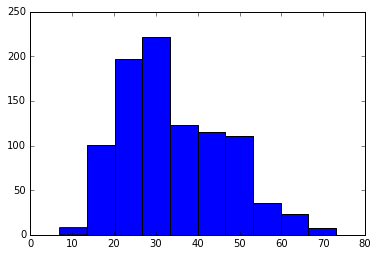

In [9]:
# Distribution of user ages
%matplotlib inline
plt.hist(users["age"])
plt.show()

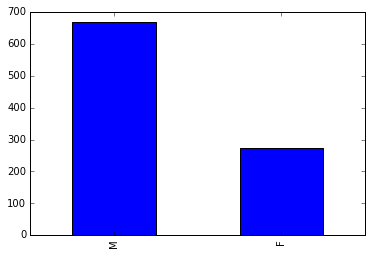

In [10]:
# Distribution of user genders
users.gender.value_counts().plot(kind='bar')

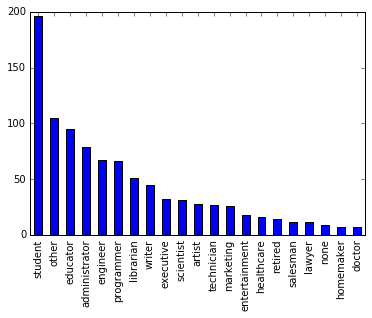

In [11]:
# Distribution of user professions
users.job.value_counts().plot(kind='bar')

In [12]:
# 0: id, 1: name, 2: relase date, 3: video release date, 4: url, 5-23: genre
# Movie data
movies.head(5)

,id,title,rl_date,vrl_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Movie data overview
movies.describe(include="all")

,id,title,rl_date,vrl_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682,1681,0,1679,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
unique,NaN,1664,240,NaN,1660,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Money Talks (1997),01-Jan-1995,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,215,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.500000,NaN,NaN,NaN,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,NaN,NaN,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# Rating data overview
print ratings.head(5)
ratings.describe(include="all")

   user  movie  rating  timestamp
0   196    242       3  881250949
1   186    302       3  891717742
2    22    377       1  878887116
3   244     51       2  880606923
4   166    346       1  886397596


,user,movie,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


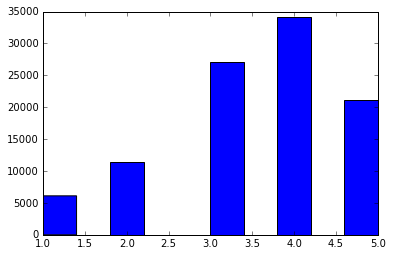

In [15]:
# Distribution of movie ratings(for different movies)
plt.hist(ratings["rating"])
plt.show()

In [16]:
# Genres of movie
print genres.head(5)
genres.describe(include="all")

        genre  id
0     unknown   0
1      Action   1
2   Adventure   2
3   Animation   3
4  Children's   4


,genre,id
count,19,19.000000
unique,19,NaN
top,Thriller,NaN
freq,1,NaN
mean,NaN,9.000000
std,NaN,5.627314
min,NaN,0.000000
25%,NaN,4.500000
50%,NaN,9.000000
75%,NaN,13.500000


In [ ]:
# Correlation analysis

In [18]:
users.head(5)

,id,age,gender,job,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [25]:
rates = ratings.sort('user')

e:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [27]:
r2 =ratings.groupby('user')

r2

In [30]:
r2.head(5)
rates.head(5)

,user,movie,rating,timestamp
66567,1,55,5,875072688
62820,1,203,4,878542231
10207,1,183,5,875072262
9971,1,150,5,876892196
22496,1,68,4,875072688


In [43]:
npmovies = np.genfromtxt('u.item',delimiter='|',dtype=str)

In [44]:
npmovies.shape

(1682L, 24L)

In [72]:
a =[]

In [73]:
b= [1,2,3]

In [74]:
a.append(b)

In [75]:
a

[[1, 2, 3]]

In [76]:
npuser = np.genfromtxt('u.user',delimiter='|',dtype=str)

In [77]:
npuser


array([['1', '24', 'M', 'technician', '85711'],
       ['2', '53', 'F', 'other', '94043'],
       ['3', '23', 'M', 'writer', '32067'],
       ..., 
       ['941', '20', 'M', 'student', '97229'],
       ['942', '48', 'F', 'librarian', '78209'],
       ['943', '22', 'M', 'student', '77841']], 
      dtype='|S13')

In [ ]:
#list1=ratelist(npratings,npmovies,npuser)

In [121]:
rating_mat=np.zeros((len(users),len(movies)))
rating_mat.shape

(943L, 1682L)

In [122]:

for i in range(len(ratings)):
    user=int(ratings.user[i])-1
    movie=int(ratings.movie[i])-1
    rating=int(ratings.rating[i])
    rating_mat[user,movie]=rating

In [123]:
rating_mat

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [124]:
rating_mat.shape

(943L, 1682L)

In [125]:
import numpy as np
import pylab as pl
from sklearn .cluster import KMeans
from sklearn import preprocessing

from sklearn import metrics

In [104]:
min_max_scaler = preprocessing.MinMaxScaler()
ratMat = min_max_scaler.fit_transform(rating_mat)

In [152]:
rating_mat

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [183]:
from numpy import *
from numpy import linalg as la
import numpy as np

def ecludSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, \
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], \
                                   dataMat[overLap,j])
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal
    
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,\
                             xformedItems[j,:].T)
        #print 'the %d and %d similarity is: %f' % (item, j, similarity)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

# This function is not needed for Assignment 4, but may be useful for experimentation
def recommend(dataMat, user, N=3, simMeas=cosSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

# This function performs cross-validation on a single user based on the test_ratio
# For example, with test_ratio = 0.2, 5-fold x-validation is performed where in each fold, 
# 20 percent of rated items are withheld and the rest are used to estimate the withheld ratings

def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = test_ratio * len(rated_items_by_user)
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)
# Compute absolute error for user u over all test items
    for item in withheld_items:
    # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

# Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u



def test(MData, testRatio, method):
    totalerror = 0.0
    total = 0
    for user in range(len(MData)):
        
        error, count = cross_validate_user(MData, user, testRatio, estMethod=method)
        totalerror += error
        total += count
    MAE = totalerror / float(total)
    print 'Mean Absoloute Error for ',method,' : ', MAE


    
def load_jokes(file):
    jokes = genfromtxt(file, delimiter=',', dtype=str)
    jokes = np.array(jokes[:,1])
    return jokes

def get_mv_text(movie, id):
    return movie[id]


In [271]:
test(rating_mat, 0.2, standEst)


Mean Absoloute Error for  <function standEst at 0x000000000E5ADF28>  :  nan


e:\Anaconda2\lib\site-packages\ipykernel\__main__.py:67: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [150]:
def print_most_similar_movies(dataMat, movie, querymovie, k, metric=pearsSim):
    mv = get_mv_text(movie, querymovie)
    print 'Selected Movie: \n'
    print mv[:5]
    
    simMovie = zeros(dataMat.shape[1])
    for i in range(dataMat.shape[1]):
        if i != querymovie:
            simMovie[i] = metric(dataMat[:,i], dataMat[:, querymovie])
    sortedVec = simMovie.argsort()[::-1]
    print '\nTop 5 Recommended movies are :\n'
    for i in range(k):
        print movie[sortedVec[i]][:5], '\n_______________\n'

In [ ]:
# Count Knn by pearsSim, then recommand the most sim n.
# The sim is based on the movoe's rating

In [222]:
 print_most_similar_movies(rating_mat,npmovies,3,5,pearsSim)

Selected Movie: 

['4' 'Get Shorty (1995)' '01-Jan-1995' ''
 'http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)']

Top 5 Recommended movies are :

['56' 'Pulp Fiction (1994)' '01-Jan-1994' ''
 'http://us.imdb.com/M/title-exact?Pulp%20Fiction%20(1994)'] 
_______________

['202' 'Groundhog Day (1993)' '01-Jan-1993' ''
 'http://us.imdb.com/M/title-exact?Groundhog%20Day%20(1993)'] 
_______________

['204' 'Back to the Future (1985)' '01-Jan-1985' ''
 'http://us.imdb.com/M/title-exact?Back%20to%20the%20Future%20(1985)'] 
_______________

['385' 'True Lies (1994)' '01-Jan-1994' ''
 'http://us.imdb.com/M/title-exact?True%20Lies%20(1994)'] 
_______________

['96' 'Terminator 2: Judgment Day (1991)' '01-Jan-1991' ''
 'http://us.imdb.com/M/title-exact?Terminator%202:%20Judgment%20Day%20(1991)'] 
_______________



In [ ]:
def unratedMovies(userId,movies,datamat):
    unrated = []
    for i in range(len(movies)):
        if datamat[userId,i] ==0:
            unrated.append(i)
    return unrated

In [279]:
# Predict all unrated movie for a user
# predict based by that user 's rating on most similiar movies
def PredictRateForUser(dataMat, movie, userId, metric=pearsSim):
    #mv = get_mv_text(movie, querymovie)
    #print 'Selected Movie: \n'
    #print mv[:5]
    
    unrated = unratedMovies(userId,movies,dataMat)
    simMovie = zeros(dataMat.shape[1])
    for querymovie in unrated:
        
        for i in range(dataMat.shape[1]):
            if i != querymovie:
                simMovie[i] = metric(dataMat[:,i], dataMat[:, querymovie])
        sortedVec = simMovie.argsort()[::-1]
        for j in sortedVec:
            if dataMat[userId][j] !=0:
                t = dataMat[userId][j]
                break
        print "Predict rating for user # %d movie: %s is: %d "%(userId,movie[querymovie][1],t)
    
   
        
        
        
    

In [282]:
 PredictRateForUser(rating_mat,npmovies,1,pearsSim)

Predict rating for user # 1 movie: GoldenEye (1995) is: 5 
Predict rating for user # 1 movie: Four Rooms (1995) is: 4 
Predict rating for user # 1 movie: Get Shorty (1995) is: 5 
Predict rating for user # 1 movie: Copycat (1995) is: 3 
Predict rating for user # 1 movie: Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) is: 4 
Predict rating for user # 1 movie: Twelve Monkeys (1995) is: 5 
Predict rating for user # 1 movie: Babe (1995) is: 5 
Predict rating for user # 1 movie: Dead Man Walking (1995) is: 4 
Predict rating for user # 1 movie: Seven (Se7en) (1995) is: 5 
Predict rating for user # 1 movie: Usual Suspects, The (1995) is: 5 
Predict rating for user # 1 movie: Mr. Holland's Opus (1995) is: 4 
Predict rating for user # 1 movie: French Twist (Gazon maudit) (1995) is: 4 
Predict rating for user # 1 movie: From Dusk Till Dawn (1996) is: 4 
Predict rating for user # 1 movie: White Balloon, The (1995) is: 3 
Predict rating for user # 1 movie: Angels and Insects (1995) is: 3 
Pre

KeyboardInterrupt: 

In [269]:
# Predict all unrated movie for a user and a specific movie
def PredictRateForUserMovie(dataMat, movie, userId,querymovie,metric=pearsSim):
    #mv = get_mv_text(movie, querymovie)
    #print 'Selected Movie: \n'
    #print mv[:5]
    
    unrated = unratedMovies(userId,movies,dataMat)
    simMovie = zeros(dataMat.shape[1])
    if querymovie not in unrated:
        print "User # %d has rated the movie, the rating is %d "%(userId,dataMat[userId][querymovie])
    else:   
        for i in range(dataMat.shape[1]):
            if i != querymovie:
                simMovie[i] = metric(dataMat[:,i], dataMat[:, querymovie])
        sortedVec = simMovie.argsort()[::-1]
        for j in sortedVec:
            if dataMat[userId][j] !=0:
                t = dataMat[userId][j]
                break
        print "Predict rating for user # %d, movie:  %s is: %d "%(userId,movie[querymovie][1],t)
    
   
        

In [270]:
PredictRateForUserMovie(rating_mat,npmovies,1,2,pearsSim)

Predict rating for user # 1, movie:  Four Rooms (1995) is: 4 


In [285]:
def PredictTest(dataMat, movie, userId, metric=pearsSim):
    #mv = get_mv_text(movie, querymovie)
    #print 'Selected Movie: \n'
    #print mv[:5]
    
    unrated = unratedMovies(userId,movies,dataMat)
    simMovie = zeros(dataMat.shape[1])
    
    for j in range(dataMat.shape[1]) :
        if j not in unrated:
            for i in range(dataMat.shape[1]):
                if i not in unrated and i !=j:
                    simMovie[i] = metric(dataMat[:,i], dataMat[:, j])
            sortedVec = simMovie.argsort()[::-1]
            for k in sortedVec:
                if dataMat[userId][k] !=0:
                    t = dataMat[userId][k]
                    break
            print "Predict rating for user # %d movie: %s is: %d "%(userId,movie[j][1],t)
            print "Actual rating for user # %d movie: %s is %d"%(userId,movie[j][1],dataMat[userId][j])
            print ""

In [286]:
 PredictTest(rating_mat,npmovies,1,pearsSim)

Predict rating for user # 1 movie: Toy Story (1995) is: 5 
Actual rating for user # 1 movie: Toy Story (1995) is 4

Predict rating for user # 1 movie: Richard III (1995) is: 4 
Actual rating for user # 1 movie: Richard III (1995) is 2

Predict rating for user # 1 movie: Mighty Aphrodite (1995) is: 5 
Actual rating for user # 1 movie: Mighty Aphrodite (1995) is 4

Predict rating for user # 1 movie: Postino, Il (1994) is: 5 
Actual rating for user # 1 movie: Postino, Il (1994) is 4

Predict rating for user # 1 movie: Antonia's Line (1995) is: 3 
Actual rating for user # 1 movie: Antonia's Line (1995) is 3

Predict rating for user # 1 movie: Birdcage, The (1996) is: 4 
Actual rating for user # 1 movie: Birdcage, The (1996) is 4

Predict rating for user # 1 movie: Star Wars (1977) is: 4 
Actual rating for user # 1 movie: Star Wars (1977) is 5

Predict rating for user # 1 movie: Fargo (1996) is: 4 
Actual rating for user # 1 movie: Fargo (1996) is 5

Predict rating for user # 1 movie: Truth

In [231]:
rating_mat.shape[1]

1682L

In [240]:
len(t)

1620

In [256]:
npmovies[2][1]

'Four Rooms (1995)'